In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

In [74]:
file_path = 'Processed_data/evolved_planktonic_processed/track100772_0_processed.txt'


In [75]:
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])



In [76]:
x_smooth = data['x_smooth']
y_smooth = data['y_smooth']
z_smooth = data['z_smooth']
time = data['time']

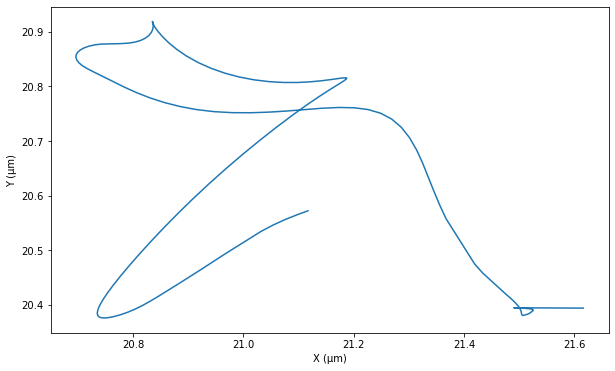

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(x_smooth,y_smooth)
plt.xlabel('X (µm)')
plt.ylabel('Y (µm)')
plt.show()

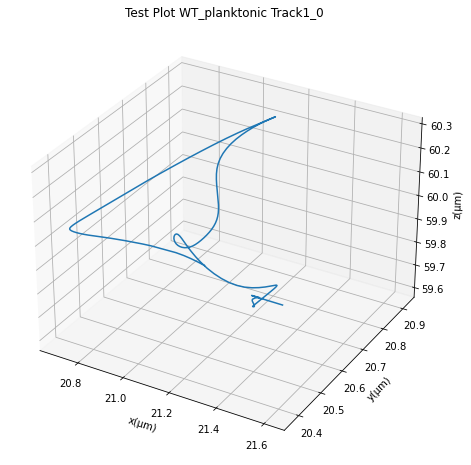

In [78]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.plot3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/MasterData/plots/track1_0_WT.png', dpi=300, bbox_inches='tight')

plt.show()

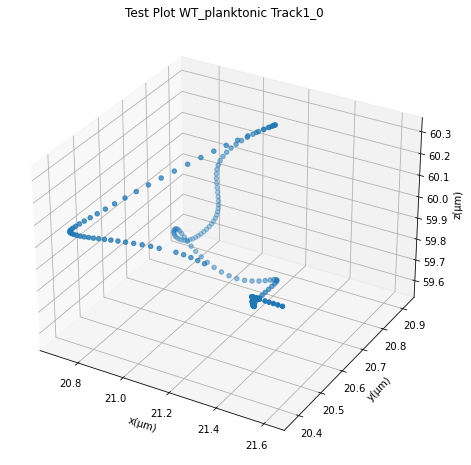

In [79]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

In [80]:
v_arr = np.zeros(len(data)-1)

In [81]:
v_arr = np.zeros(len(data))
t_arr = np.zeros(len(data)-1)
# Loop through the data starting from the second point to the second-to-last point
for i in range(1, len(data)-1):
    #dt = 0.005
    t_next = time.iloc[i+1]
    x_next = x_smooth.iloc[i+1]
    y_next = y_smooth.iloc[i+1]
    z_next = z_smooth.iloc[i+1]
    
    t_prev = time.iloc[i-1]
    x_prev = x_smooth.iloc[i-1]
    y_prev = y_smooth.iloc[i-1]
    z_prev = z_smooth.iloc[i-1]
    
    # Calculate radial distance for next and previous points
    #r_next = np.sqrt((x_next**2 + y_next**2 + z_next**2))
    #r_prev = np.sqrt((x_prev**2 + y_prev**2 + z_prev**2))
    
    
    r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
    dt = t_next - t_prev
  
  
    # Compute velocity at the current point using central difference
    v = r_diff/ (dt)

    v_arr[i] = v
    t_arr[i]= dt
    
    
   

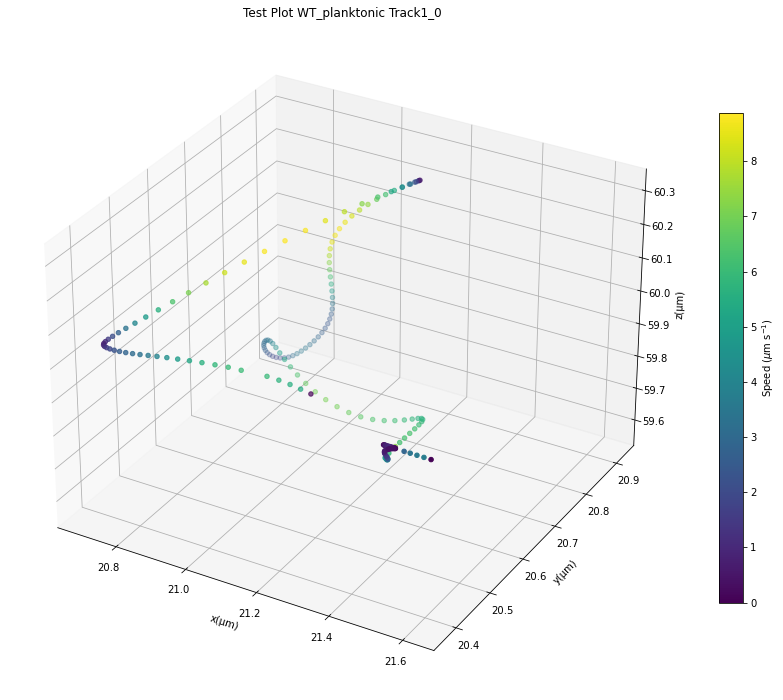

In [82]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x_smooth, y_smooth, z_smooth, c=v_arr, cmap='viridis', marker='o')

# Add color bar to show velocity scale
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label(r'Speed ($\mu$m s$^{-1}$)')
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/documents/0_Mphys_Project/plots/track1_0_WT_withv', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter3d(
    x=x_smooth,
    y=y_smooth,
    z=z_smooth,
    mode='markers',
    marker=dict(
        size=5,  
        color=v_arr,  
        colorscale='Picnic',  
        colorbar=dict(
            title=dict(
                text='Speed (µm s<sup>-1</sup>)',  
                font=dict(size=12)  
            ),
            titleside='right'  
        ),
        showscale=True,
    )
))

# Add titles and labels
fig.update_layout(
    title='Test Plot WT_planktonic Track1_0',
    scene=dict(
        xaxis_title='x (µm)',
        yaxis_title='y (µm)',
        zaxis_title='z (µm)',
        
        aspectmode='cube'  # Optional: maintains equal aspect ratio
    ),
    width=800,  # Set width of the plot
    height=800,  # Set height of the plot
)

# Show the plot
fig.show()


In [25]:
t_arr

filtered_times = t_arr[t_arr > 0.012]
print(filtered_times)

[0.015 0.015 0.015 0.02  0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015
 0.02  0.015 0.02  0.02  0.015 0.015 0.015 0.015 0.025 0.025 0.015 0.015
 0.015 0.015 0.015 0.015 0.015 0.02  0.015 0.015 0.015 0.015 0.015 0.02
 0.025 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015
 0.015 0.015 0.015 0.015 0.015 0.03  0.03  0.015 0.015 0.015 0.015 0.015]


In [26]:
indices = np.where(t_arr > 0.012)[0]

# Print the corresponding indices
print("Indices of filtered times in t_arr:", indices)

Indices of filtered times in t_arr: [  77   78  549  550  551  564  565  644  645  674  675  709  710  711
  728  729  742  743  820  821  825  826  828  829  830  831 1974 1975
 2040 2041 2042 2043 2044 2045 2046 3000 3001 3002 3329 3330 3555 3556
 5153 5154 5155 5156 5252 5253 5377 5378 5484 5485 5512 5513 5514 5515
 5569 5570 5849 5850]
